In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/UNICORN.csv')


In [ ]:
df.head()

,Unnamed: 0,Startup Name,Industry,FoundingYear,Unicorn Entry Year,Profit in 2021,CurrentValuation,Acquisitions,IPO Status,location
0,0,PhysicsWallah,Technology,Post Startup India Scheme,2022,-$0.877 Million,1.1,0,Unlisted,North Region
1,1,LeadSquared,Technology,Pre Startup India Scheme,2022,-$1 Million,1.0,0,Unlisted,South Region
2,2,ElasticRun,E-Commerce,Pre Startup India Scheme,2022,-$12 Million,1.5,0,Unlisted,West Region
3,3,LEAD School,Technology,Pre Startup India Scheme,2022,-$15 Million,1.1,1,Unlisted,West Region
4,4,Purplle,E-Commerce,Pre Startup India Scheme,2022,-$6 Million,1.1,1,Unlisted,West Region


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          104 non-null    int64  
 1   Startup Name        104 non-null    object 
 2   Industry            104 non-null    object 
 3   FoundingYear        104 non-null    object 
 4   Unicorn Entry Year  104 non-null    int64  
 5   Profit in 2021      67 non-null     object 
 6   CurrentValuation    104 non-null    float64
 7   Acquisitions        104 non-null    int64  
 8   IPO Status          104 non-null    object 
 9   location            104 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 8.2+ KB


In [ ]:
df['location'].unique()

array(['North Region', 'South Region', 'West Region'], dtype=object)

In [ ]:
df.loc[df["location"]== "Karantaka","location"]="Karnataka"
df.loc[df["location"]== "Karnatka","location"]="Karnataka"
df.loc[df["location"]== "Delhi ","location"]="Delhi"
df.loc[df["location"]== "Mahrashtra","location"]="Maharashtra"

In [ ]:
df['location'].unique()

array(['North Region', 'South Region', 'West Region'], dtype=object)

In [ ]:
for i in df['location']:
  if i == 'Tamil Nadu' or i == 'Karnataka' or i == 'Telangana':
     i = 'South Region'

In [ ]:
df['location'] = df["location"].replace(["Tamil Nadu",'Karnataka','Telangana'],"South Region")
df['location'] = df["location"].replace(["Delhi",'Haryana','Uttar Pradesh','Rajasthan'],"North Region")
df['location'] = df["location"].replace(["Maharashtra"],"West Region")

In [ ]:
df['location'].unique()

array(['North Region', 'South Region', 'West Region'], dtype=object)

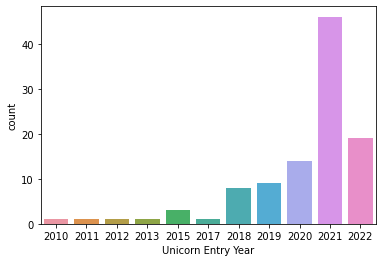

In [ ]:
sns.countplot(x="Unicorn Entry Year",data=df)

In [ ]:
df["Unicorn Entry Year"].value_counts() [2022]

19

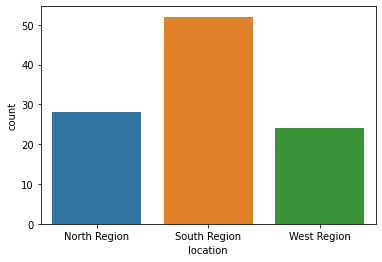

In [ ]:
import seaborn as sns
sns.countplot(x="location",data=df)

In [ ]:
df["FoundingYear"].unique()

array(['Post Startup India Scheme', 'Pre Startup India Scheme'],
      dtype=object)

In [ ]:
df['FoundingYear'] = df["FoundingYear"].replace([2011,2015,2012,2006,2008,2000,2014,2009,2010,2007, 2013, 1984, 2004,1998,2005],"Pre Startup India Scheme")
df['FoundingYear'] = df["FoundingYear"].replace([2016,2018,2017,2019,2021],"Post Startup India Scheme")

In [ ]:
df['FoundingYear'].unique()

In [ ]:
sns.countplot(x="Founding Year",data=df)

In [ ]:
df["Current Valuation"].unique()

In [ ]:
for i in df.index:
  num = ""
  for c in df.iat[i,5]:
    if c.isdigit() or c == '.':
      num = num + c
      df.loc[i, ['Current Valuation']] = [num]



In [ ]:
df['Current Valuation'] = df['Current Valuation'].astype('float64')

In [ ]:
ax = df["Current Valuation"].plot(kind='line')

In [ ]:
df["Current Valuation"] = np.cbrt(df["Current Valuation"])

In [ ]:
df.info()

In [ ]:
df. rename(columns = {'Current Valuation':'CurrentValuation', 'Founding Year':'FoundingYear'}, inplace = True)
df.info()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model= ols('CurrentValuation ~ C(FoundingYear) + C(location) + C(FoundingYear): C(location)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(FoundingYear),66.044252,1.0,3.089717,0.081911
C(location),8.209043,2.0,0.192020,0.825600
C(FoundingYear):C(location),35.669677,2.0,0.834359,0.437213
Residual,2094.799191,98.0,NaN,NaN


From the first p value we get that founding year does have an effect on the valuation of the unicorn,whereas for location dosenot and there is no interaction effect between the two columns.

In [ ]:
df.to_csv(r"/content/drive/MyDrive/UNICORN.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df['Industry'].unique()

In [ ]:
df['Industry'] = df["Industry"].replace(["Edtech",'SaaS- CRM','Gaming','SaaS- Analytics','Content Technology','SaaS- HR','Marketplace- Automotives','SaaS- Conversational Automation','SaaS- Programming Tools','PropTech','ESports',"Social Media",'Marketplace- Employment','Automotive',"Home Services",'Software','Cloud Infrastructure and Software','Blockchain','Saas- Enterprise Software','Social News','Mobile Technology','Saas- API Development and Testing','Saas- Contract Management','Saas- Data Management','Saas- Contract Management',
       'Saas- Data Management','Foodtech','Fantasy Sports','SaaS - CRM','Adtech', 'Online Travel','Saas- Spa and Salon Services'],"Technology")
df["Industry"]=df["Industry"].replace(['E-commerce Logistics','B2B E-commerce','E-commerce Personal Care','E-commerce','E-commerce Interior Design', 'E-commerce Management Platform','E-commerce Automotives', 'E-commerce Meat Products','E-commerce- Groceries', 'E-commerce Food Delivery', 'E-commerce Retail', 'B2C E-commerce','E-commerce Logistics Services', 'E-commerce- Eyewear','E-commerce Finance'],'E-Commerce')
df["Industry"]=df["Industry"].replace(['Fintech','Fintech Payments','Insurtech', 'Financial Technology','Financial Services','Cryptocurrencies','Cryptocurrency Exchange','Insurance company','Insurance','Stockbroker'],"Finance")
df["Industry"]=df["Industry"].replace(['Building Materials', 'Logistics','Transportation','Renewable Energy'],"Transportation")
df["Industry"]=df["Industry"].replace(["Healthcare Technology",'Healthtech', 'Healthcare','Online Pharmacy'],"Healthcare")
df["Industry"]=df["Industry"].replace(['Media, Advertising','Marketplace- Consumer goods','Personal Care Marketplace', 'Hospitality'],'Others')

In [ ]:
df['Industry'].unique()

In [ ]:
sns.countplot(x="Industry",data=df)

In [ ]:
df1=pd.read_csv("/content/unnicorns data set.csv")
df1.info()

In [ ]:
for i in df1.index:
  num = ""
  for c in df1.iat[i,1]:
    if c.isdigit() or c == '.':
      num = num + c
      df1.loc[i, ['Valuation ($B)']] = [num]

In [ ]:
df1.drop(df1[df1['Country'] == 'India'].index, inplace = True)

In [ ]:
import random
world_u=df1['Valuation ($B)'].tolist()
world_sample=random.choices(world_u, k=50)
indian_u=df["CurrentValuation"].tolist()
indian_sample=random.choices(indian_u, k=50)
ws=np.array(world_sample)
ins=np.array(indian_sample)
print(ins)


In [ ]:
import numpy as np
import scipy.stats as stats

#ttest
print(stats.ttest_ind(ws,ins, equal_var=True))